Você recebeu um conjunto de dados com informações sobre as vendas realizadas por diferentes vendedores em uma loja. O objetivo é criar uma análise personalizada para calcular o desempenho de cada vendedor com base em suas metas, vendas realizadas e comissões.

O DataFrame contém as seguintes colunas iniciais:

- Vendedor: Nome do vendedor.

- Meta: Meta de vendas do vendedor (em reais).

- Vendas: Valor total de vendas realizadas pelo vendedor (em reais).

- Comissão (%): Percentual de comissão que o vendedor recebe com base nas vendas realizadas.

Sua tarefa é:

1 - Usar o método apply para criar uma nova coluna chamada Desempenho, que indica o desempenho do vendedor com base nas vendas realizadas:

- Se as vendas forem maiores ou iguais à meta, o desempenho deve ser "Atingiu a Meta".

- Se as vendas forem menores que a meta, o desempenho deve ser "Não Atingiu a Meta".

2 - Usar o método apply para calcular o valor total da comissão de cada vendedor e armazená-lo em uma nova coluna chamada Comissão Recebida. O cálculo deve ser feito com a fórmula:

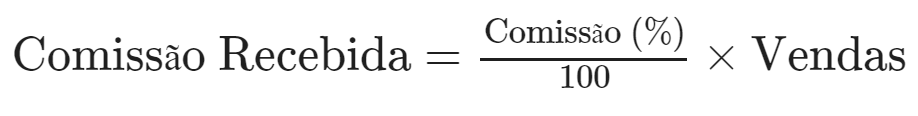

3 - Exibir as colunas Vendedor, Meta, Vendas, Desempenho e Comissão Recebida.

In [2]:
import pandas as pd

# Dados dos vendedores
data = {
    'Vendedor': ['Ana', 'Bruno', 'Carla', 'Daniel', 'Eduarda', 'Felipe', 'Gabriela', 'Henrique'],
    'Meta': [20000, 15000, 18000, 25000, 12000, 30000, 10000, 22000],
    'Vendas': [22000, 14000, 19000, 24000, 13000, 28000, 9000, 23000],
    'Comissão (%)': [5, 4, 6, 5, 4, 7, 3, 6]
}

# Criando o DataFrame
df = pd.DataFrame(data)

In [3]:
df

,Vendedor,Meta,Vendas,Comissão (%)
0,Ana,20000,22000,5
1,Bruno,15000,14000,4
2,Carla,18000,19000,6
3,Daniel,25000,24000,5
4,Eduarda,12000,13000,4
5,Felipe,30000,28000,7
6,Gabriela,10000,9000,3
7,Henrique,22000,23000,6


Objetivo:

- Criar a nova coluna Desempenho com base na comparação entre as colunas Vendas e Meta.

- Criar a nova coluna Comissão Recebida com base no cálculo da comissão.

- Exibir as colunas Vendedor, Meta, Vendas, Desempenho e Comissão Recebida.

In [4]:
df['Comissão Recebida'] = df.apply(lambda x: (x['Comissão (%)'] / 100) * x['Vendas'], axis=1)

df['Desempenho'] = df.apply(lambda x: 'Atingiu a meta' if x['Vendas'] >= x['Meta'] else 'Não atingiu a meta', axis=1)

In [15]:
df.loc[:, df.columns != 'Comissão (%)']

,Vendedor,Meta,Vendas,Comissão Recebida,Desempenho
0,Ana,20000,22000,1100.0,Atingiu a meta
1,Bruno,15000,14000,560.0,Não atingiu a meta
2,Carla,18000,19000,1140.0,Atingiu a meta
3,Daniel,25000,24000,1200.0,Não atingiu a meta
4,Eduarda,12000,13000,520.0,Atingiu a meta
5,Felipe,30000,28000,1960.0,Não atingiu a meta
6,Gabriela,10000,9000,270.0,Não atingiu a meta
7,Henrique,22000,23000,1380.0,Atingiu a meta


In [ ]:
# Quem atingiu a meta

df.groupby(by='Desempenho').get_group('Atingiu a meta')

,Vendedor,Meta,Vendas,Comissão (%),Comissão Recebida,Desempenho
0,Ana,20000,22000,5,1100.0,Atingiu a meta
2,Carla,18000,19000,6,1140.0,Atingiu a meta
4,Eduarda,12000,13000,4,520.0,Atingiu a meta
7,Henrique,22000,23000,6,1380.0,Atingiu a meta


In [32]:
# Comissão total recebida de quem atingiu a meta

df.groupby(by='Desempenho').get_group('Atingiu a meta')[['Comissão Recebida']].sum().reset_index()

,index,0
0,Comissão Recebida,4140.0


In [ ]:
# Quem não atingiu a meta

df.groupby(by='Desempenho').get_group('Não atingiu a meta')

,Vendedor,Meta,Vendas,Comissão (%),Comissão Recebida,Desempenho
1,Bruno,15000,14000,4,560.0,Não atingiu a meta
3,Daniel,25000,24000,5,1200.0,Não atingiu a meta
5,Felipe,30000,28000,7,1960.0,Não atingiu a meta
6,Gabriela,10000,9000,3,270.0,Não atingiu a meta


In [6]:
import matplotlib.pyplot as plt

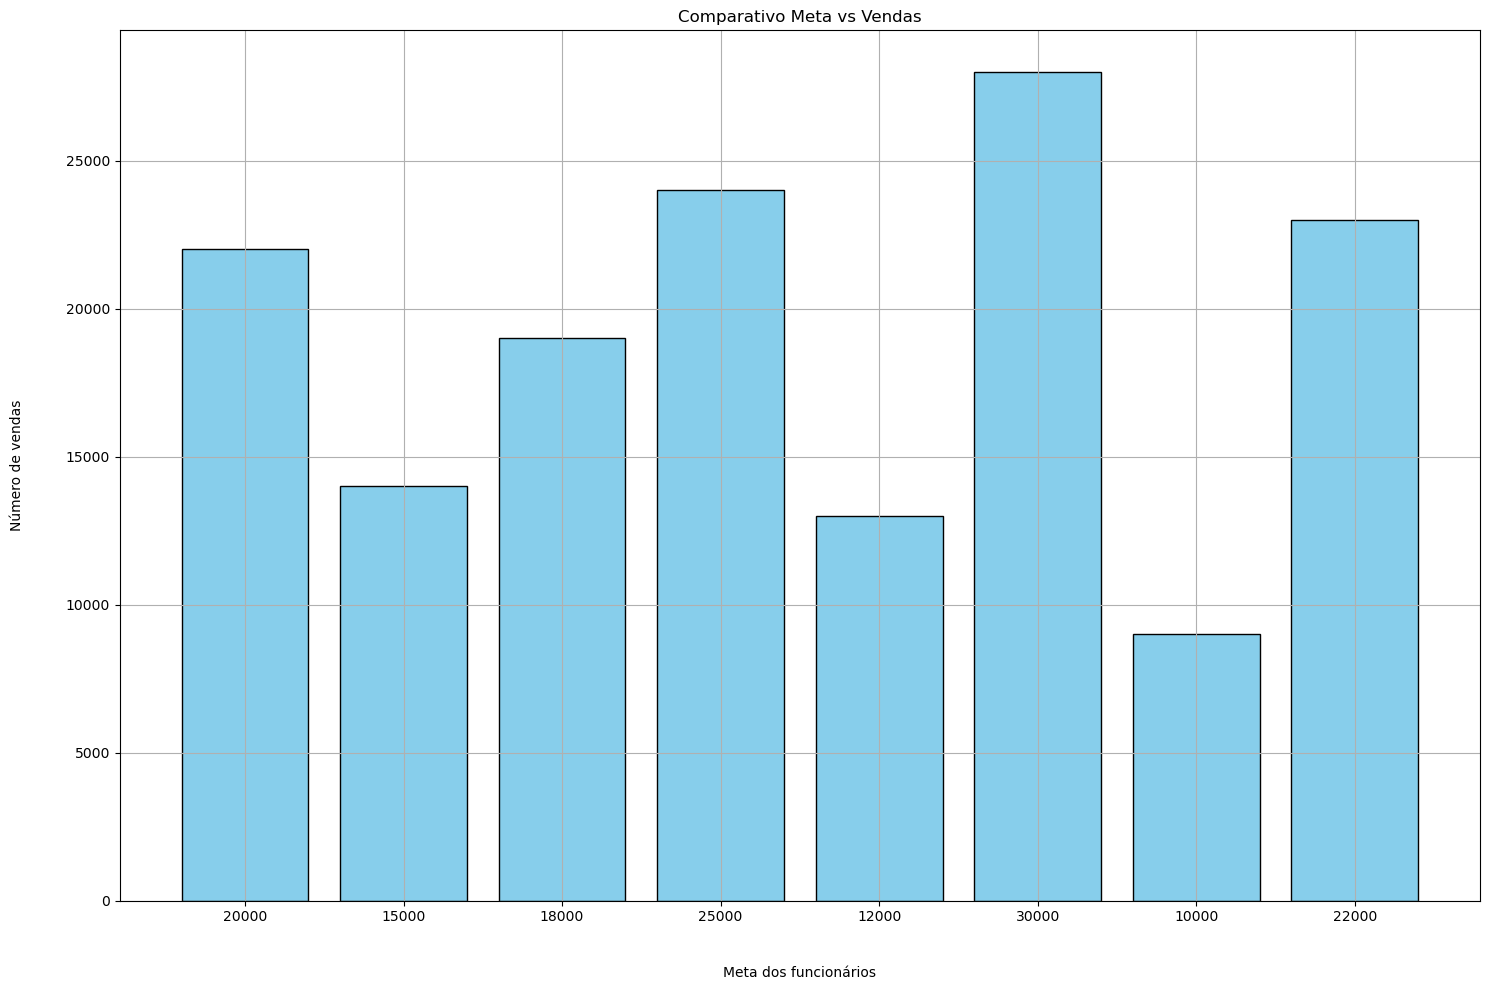

In [7]:

fig = plt.figure(figsize=(15, 10))

x = df['Meta'].astype(str)
y = df['Vendas']

plt.bar(x, y, color='skyblue', edgecolor='#000', linewidth=1)
plt.grid()
plt.title("Comparativo Meta vs Vendas")
plt.xlabel("Meta dos funcionários", labelpad=30)
plt.ylabel("Número de vendas", labelpad=30)
plt.tight_layout()
plt.show()
